# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('moviereviews.csv')

In [5]:
df['label'].value_counts()

neg    1000
pos    1000
Name: label, dtype: int64

**TASK: Check to see if there are any missing values in the dataframe.**

In [12]:
df.isna().sum()

label      0
review    35
dtype: int64

**TASK: Remove any reviews that are NaN**

In [13]:
df = df.dropna()

In [14]:
df.isna().sum()

label     0
review    0
dtype: int64

**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [22]:
df = df[~df['review'].str.isspace()]

In [23]:
df['review'].str.isspace().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**TASK: Confirm the value counts per label:**

In [26]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
count_vect = CountVectorizer(stop_words='english')
matrix = count_vect.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(count_vect.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print(sorted(freqs, key=lambda x: -x[1])[:20])

[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [32]:
count_vect = CountVectorizer(stop_words='english')
matrix = count_vect.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(count_vect.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print(sorted(freqs, key=lambda x: -x[1])[:20])

[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [33]:
X = df['review']
y= df['label']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC, LinearSVC

In [54]:
pipe = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



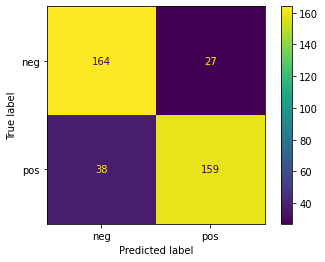

In [55]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(y_test, pipe.predict(X_test)))
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test);

              precision    recall  f1-score   support

         neg       0.81      0.85      0.83       191
         pos       0.85      0.80      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



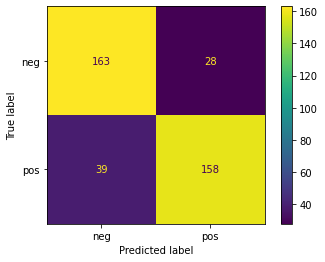

In [45]:
pipe = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC())])
pipe.fit(X_train, y_train)
print(classification_report(y_test, pipe.predict(X_test)))
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test);

              precision    recall  f1-score   support

         neg       0.75      0.92      0.83       191
         pos       0.90      0.70      0.79       197

    accuracy                           0.81       388
   macro avg       0.83      0.81      0.81       388
weighted avg       0.83      0.81      0.81       388



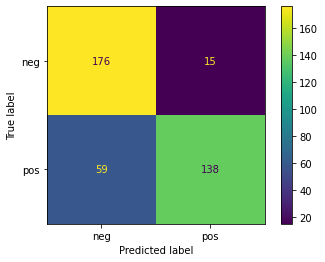

In [53]:
from sklearn.naive_bayes import MultinomialNB

pipe = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])
pipe.fit(X_train, y_train)
print(classification_report(y_test, pipe.predict(X_test)))
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test);